# Simple Image Rotations

In this recipe we learn how to create a 2x2 image of all the possible simple rotation of an image using the rotate function.

In [1]:
(ns opencv4.rotations-collage
  (:require
    [opencv4.utils :as u]
    [opencv4.core :refer :all]))

nil

To make the image usable for rotations, we start by writing a function turning the image into a square version, cropping at the proper places. 

In [2]:
(defn center-crop[img dest]
  (let[
    w (cols img)
    h (rows img)
    s (clojure.core/min w h)
    rect (new-rect
      (- (/ w 2) (/ s 2))
      (- (/ h 2) (/ s 2))
      s
      s)]
    (-> img
        (submat rect)
        (copy-to dest)
        )))

(defn center-crop![src]
  (center-crop src src)
  src)

#'opencv4.rotations-collage/center-crop!

You can see the result into action below.

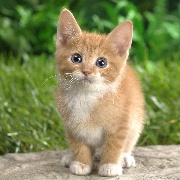

In [3]:
(-> 
  "resources/images/cat.jpg" 
  (imread)
  (u/resize-by 0.15)
  (u/>>>))

(-> 
  "resources/images/cat.jpg" 
  (imread)
  (center-crop!)
  (u/resize-by 0.15)
  (u/>>>))

In [4]:
(defn rotation-collage![img0]
  (let[
    img1 (-> img0 clone center-crop!)
    img2 (-> img0 clone (rotate! ROTATE_90_CLOCKWISE) center-crop!)
    img3 (-> img0 clone (rotate! ROTATE_180) center-crop!)
    img4 (-> img0 clone (rotate! ROTATE_90_COUNTERCLOCKWISE) center-crop!)
    ]
    (vconcat! [(hconcat! [img4 img2])
(hconcat! [img3 img1])] )))

#'opencv4.rotations-collage/rotation-collage!

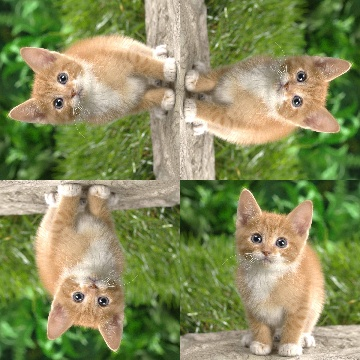

In [5]:
(-> 
  "resources/images/cat.jpg" 
  (imread)
  (u/resize-by 0.15)
  (rotation-collage!)
  (u/>>>))